# 01. Data Exploration and Understanding

**Author**: Rafsamjani Anugrah  
**Date**: 2024  
**Project**: Credit Risk Prediction - ID/X Partners  

## Tujuan Notebook

Notebook ini berfokus pada:
1. Memuat dan memahami dataset loan data 2007-2014
2. Analisis awal struktur data dan karakteristik
3. Identifikasi masalah data quality
4. Eksplorasi distribusi variabel target
5. Persiapan untuk tahap cleaning selanjutnya

## Dataset Information

- **Source**: Lending Club Loan Data (2007-2014)
- **Format**: CSV
- **Purpose**: Memprediksi risiko kredit (default vs fully paid)

In [8]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import os

# Set styling untuk visualisasi
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print("📚 Libraries imported successfully!")
print(f"📅 Analysis date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"📁 Working directory: {os.getcwd()}")

📚 Libraries imported successfully!
📅 Analysis date: 2025-12-10 01:09:03
📁 Working directory: d:\Projek pribadi\scholarship,exchange,pelatihan\Rakamin-VIX-Intership-IDX\notebooks


## 1. Load Dataset

In [9]:
# Cek lokasi file dataset
data_paths = [
    '../data/raw/loan_data_2007_2014.csv',
    '../../data/raw/loan_data_2007_2014.csv',
    'data/raw/loan_data_2007_2014.csv',
    'loan_data_2007_2014.csv'
]

data_path = None
for path in data_paths:
    if os.path.exists(path):
        data_path = path
        break

if data_path:
    print(f"✅ Dataset found at: {data_path}")
    
    # Load dataset dengan parameter optimal
    print("📊 Loading dataset...")
    
    try:
        # Load data dengan sampling untuk preview cepat (jika file besar)
        df = pd.read_csv(data_path, low_memory=False)
        
        print(f"✅ Dataset loaded successfully!")
        print(f"📏 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
        print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
        
    except Exception as e:
        print(f"❌ Error loading dataset: {e}")
        df = None
        
else:
    print("❌ Dataset not found in any of the expected paths:")
    for path in data_paths:
        print(f"   - {path}")
    print("\n💡 Please ensure the dataset is available in the data/raw/ directory")
    df = None

✅ Dataset found at: ../data/raw/loan_data_2007_2014.csv
📊 Loading dataset...
✅ Dataset loaded successfully!
📏 Shape: 466,285 rows × 75 columns
💾 Memory usage: 779.9 MB


In [10]:
# Tampilkan informasi dasar dataset
if df is not None:
    print("="*80)
    print("DATASET OVERVIEW")
    print("="*80)
    
    print(f"\n📊 Basic Statistics:")
    print(f"   Total Records: {df.shape[0]:,}")
    print(f"   Total Features: {df.shape[1]}")
    print(f"   File Size: {os.path.getsize(data_path) / 1024**2:.1f} MB")
    
    # Tampilkan sample data
    print(f"\n👀 First 3 rows:")
    display(df.head(3))
    
    # Tampilkan tipe data
    print(f"\n🔢 Data Types:")
    dtype_counts = df.dtypes.value_counts()
    for dtype, count in dtype_counts.items():
        print(f"   {dtype}: {count} columns")
    
    # Tampilkan informasi kolom
    print(f"\n📋 Column Information:")
    display(df.info(verbose=False))
else:
    print("❌ No dataset available for exploration")

DATASET OVERVIEW

📊 Basic Statistics:
   Total Records: 466,285
   Total Features: 75
   File Size: 229.0 MB

👀 First 3 rows:


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.000,36 months,10.650,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0.000,Jan-85,1.000,NaN,NaN,3.000,0.000,13648,83.700,9.000,f,0.000,0.000,5861.071,5831.780,5000.000,861.070,0.000,0.000,0.000,Jan-15,171.620,NaN,Jan-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.000,60 months,15.270,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0.000,Apr-99,5.000,NaN,NaN,3.000,0.000,1687,9.400,4.000,f,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,NaN,Sep-13,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.000,36 months,15.960,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.720,0.000,Nov-01,2.000,NaN,NaN,2.000,0.000,2956,98.500,10.000,f,0.000,0.000,3003.654,3003.650,2400.000,603.650,0.000,0.000,0.000,Jun-14,649.910,NaN,Jan-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



🔢 Data Types:
   float64: 46 columns
   object: 22 columns
   int64: 7 columns

📋 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Columns: 75 entries, Unnamed: 0 to inq_last_12m
dtypes: float64(46), int64(7), object(22)
memory usage: 266.8+ MB


None

## 2. Column Analysis and Structure

In [11]:
if df is not None:
    print("="*80)
    print("COLUMN ANALYSIS")
    print("="*80)
    
    # Daftar semua kolom
    print(f"\n📝 All Columns ({len(df.columns)} total):")
    for i, col in enumerate(df.columns, 1):
        print(f"   {i:2d}. {col}")
    
    # Group columns by logical categories
    print(f"\n🗂️ Column Categories:")
    
    # Loan characteristics
    loan_cols = [col for col in df.columns if any(x in col.lower() 
                for x in ['loan', 'amount', 'term', 'rate', 'purpose', 'grade'])]
    print(f"\n💰 Loan Characteristics ({len(loan_cols)}):")
    for col in loan_cols:
        print(f"   - {col}")
    
    # Borrower information
    borrower_cols = [col for col in df.columns if any(x in col.lower() 
                   for x in ['annual', 'emp', 'home', 'verification', 'dti'])]
    print(f"\n👤 Borrower Information ({len(borrower_cols)}):")
    for col in borrower_cols:
        print(f"   - {col}")
    
    # Credit history
    credit_cols = [col for col in df.columns if any(x in col.lower() 
                 for x in ['fico', 'credit', 'delinq', 'revol', 'pub_rec', 'earliest'])]
    print(f"\n📈 Credit History ({len(credit_cols)}):")
    for col in credit_cols:
        print(f"   - {col}")
    
    # Status and dates
    status_cols = [col for col in df.columns if any(x in col.lower() 
                 for x in ['status', 'issue', 'last', 'next'])]
    print(f"\n📅 Status and Dates ({len(status_cols)}):")
    for col in status_cols:
        print(f"   - {col}")
else:
    print("❌ No dataset available")

COLUMN ANALYSIS

📝 All Columns (75 total):
    1. Unnamed: 0
    2. id
    3. member_id
    4. loan_amnt
    5. funded_amnt
    6. funded_amnt_inv
    7. term
    8. int_rate
    9. installment
   10. grade
   11. sub_grade
   12. emp_title
   13. emp_length
   14. home_ownership
   15. annual_inc
   16. verification_status
   17. issue_d
   18. loan_status
   19. pymnt_plan
   20. url
   21. desc
   22. purpose
   23. title
   24. zip_code
   25. addr_state
   26. dti
   27. delinq_2yrs
   28. earliest_cr_line
   29. inq_last_6mths
   30. mths_since_last_delinq
   31. mths_since_last_record
   32. open_acc
   33. pub_rec
   34. revol_bal
   35. revol_util
   36. total_acc
   37. initial_list_status
   38. out_prncp
   39. out_prncp_inv
   40. total_pymnt
   41. total_pymnt_inv
   42. total_rec_prncp
   43. total_rec_int
   44. total_rec_late_fee
   45. recoveries
   46. collection_recovery_fee
   47. last_pymnt_d
   48. last_pymnt_amnt
   49. next_pymnt_d
   50. last_credit_pull_d
   

## 3. Target Variable Analysis (Loan Status)

TARGET VARIABLE ANALYSIS - LOAN STATUS

📊 Loan Status Distribution:
   Current                   : 224,226 ( 48.09%)
   Fully Paid                : 184,739 ( 39.62%)
   Charged Off               :  42,475 (  9.11%)
   Late (31-120 days)        :   6,900 (  1.48%)
   In Grace Period           :   3,146 (  0.67%)
   Does not meet the credit policy. Status:Fully Paid :   1,988 (  0.43%)
   Late (16-30 days)         :   1,218 (  0.26%)
   Default                   :     832 (  0.18%)
   Does not meet the credit policy. Status:Charged Off :     761 (  0.16%)


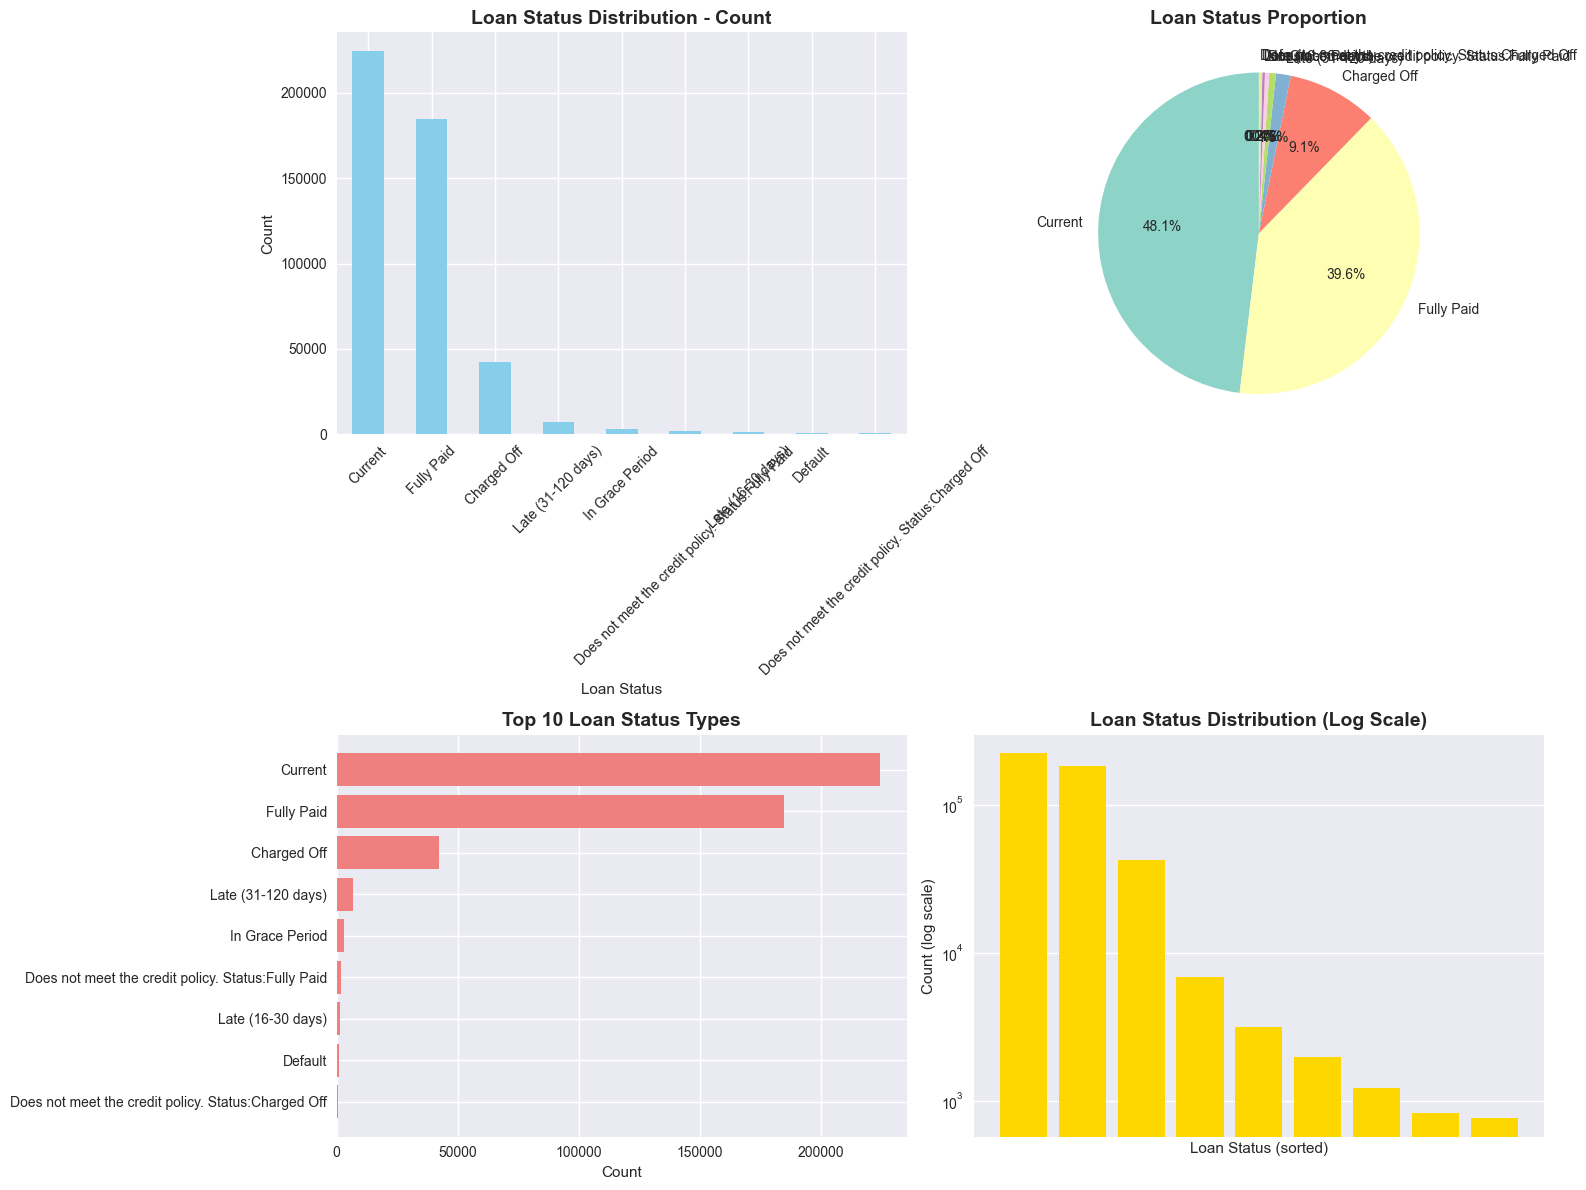


🎯 Completed Loans Analysis:
   Completed loans (Fully Paid + Charged Off): 227,214 (48.7%)
   Fully Paid: 184,739
   Charged Off: 42,475
   Default rate among completed loans: 18.69%
   Success rate among completed loans: 81.31%


In [12]:
if df is not None and 'loan_status' in df.columns:
    print("="*80)
    print("TARGET VARIABLE ANALYSIS - LOAN STATUS")
    print("="*80)
    
    # Analisis distribusi loan status
    status_counts = df['loan_status'].value_counts()
    status_percentages = (status_counts / len(df) * 100).round(2)
    
    print(f"\n📊 Loan Status Distribution:")
    print("="*50)
    for status, count in status_counts.items():
        percentage = status_percentages[status]
        print(f"   {status:25} : {count:>7,} ({percentage:>6.2f}%)")
    
    # Visualisasi distribusi
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # Bar chart
    status_counts.plot(kind='bar', ax=ax1, color='skyblue')
    ax1.set_title('Loan Status Distribution - Count', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Loan Status')
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=45)
    
    # Pie chart
    colors = plt.cm.Set3(np.linspace(0, 1, len(status_counts)))
    wedges, texts, autotexts = ax2.pie(status_counts, labels=status_counts.index, 
                                     autopct='%1.1f%%', colors=colors, startangle=90)
    ax2.set_title('Loan Status Proportion', fontsize=14, fontweight='bold')
    
    # Horizontal bar chart untuk top 10
    top_10_status = status_counts.head(10)
    y_pos = range(len(top_10_status))
    ax3.barh(y_pos, top_10_status.values, color='lightcoral')
    ax3.set_yticks(y_pos)
    ax3.set_yticklabels(top_10_status.index)
    ax3.invert_yaxis()  # Labels read top-to-bottom
    ax3.set_xlabel('Count')
    ax3.set_title('Top 10 Loan Status Types', fontsize=14, fontweight='bold')
    
    # Log scale untuk distribusi
    ax4.bar(range(len(status_counts)), status_counts.values, color='gold')
    ax4.set_yscale('log')
    ax4.set_xlabel('Loan Status (sorted)')
    ax4.set_ylabel('Count (log scale)')
    ax4.set_title('Loan Status Distribution (Log Scale)', fontsize=14, fontweight='bold')
    ax4.set_xticks([])  # Hide x-axis labels for clarity
    
    plt.tight_layout()
    plt.show()
    
    # Analisis khusus untuk completed loans
    completed_loans = ['Fully Paid', 'Charged Off']
    df_completed = df[df['loan_status'].isin(completed_loans)]
    
    print(f"\n🎯 Completed Loans Analysis:")
    print("="*40)
    print(f"   Completed loans (Fully Paid + Charged Off): {len(df_completed):,} ({len(df_completed)/len(df)*100:.1f}%)")
    print(f"   Fully Paid: {len(df_completed[df_completed['loan_status'] == 'Fully Paid']):,}")
    print(f"   Charged Off: {len(df_completed[df_completed['loan_status'] == 'Charged Off']):,}")
    
    # Default rate calculation
    if len(df_completed) > 0:
        default_rate = (df_completed['loan_status'] == 'Charged Off').mean() * 100
        print(f"   Default rate among completed loans: {default_rate:.2f}%")
        print(f"   Success rate among completed loans: {100-default_rate:.2f}%")
    
else:
    print("❌ Loan status column not found or no dataset available")

## 4. Missing Values Analysis

MISSING VALUES ANALYSIS

📊 Missing Values Summary:
   Total columns: 75
   Columns with missing values: 40 (53.3%)
   Columns with >50% missing: 21
   Total missing values: 9,776,227

📋 Columns with Missing Values (40 columns):
max_bal_bc                     |  466,285 | 100.00% | ██████████████████████████████████████████████████
open_rv_24m                    |  466,285 | 100.00% | ██████████████████████████████████████████████████
inq_fi                         |  466,285 | 100.00% | ██████████████████████████████████████████████████
open_rv_12m                    |  466,285 | 100.00% | ██████████████████████████████████████████████████
il_util                        |  466,285 | 100.00% | ██████████████████████████████████████████████████
mths_since_rcnt_il             |  466,285 | 100.00% | ██████████████████████████████████████████████████
total_bal_il                   |  466,285 | 100.00% | ██████████████████████████████████████████████████
open_il_24m                    |  466

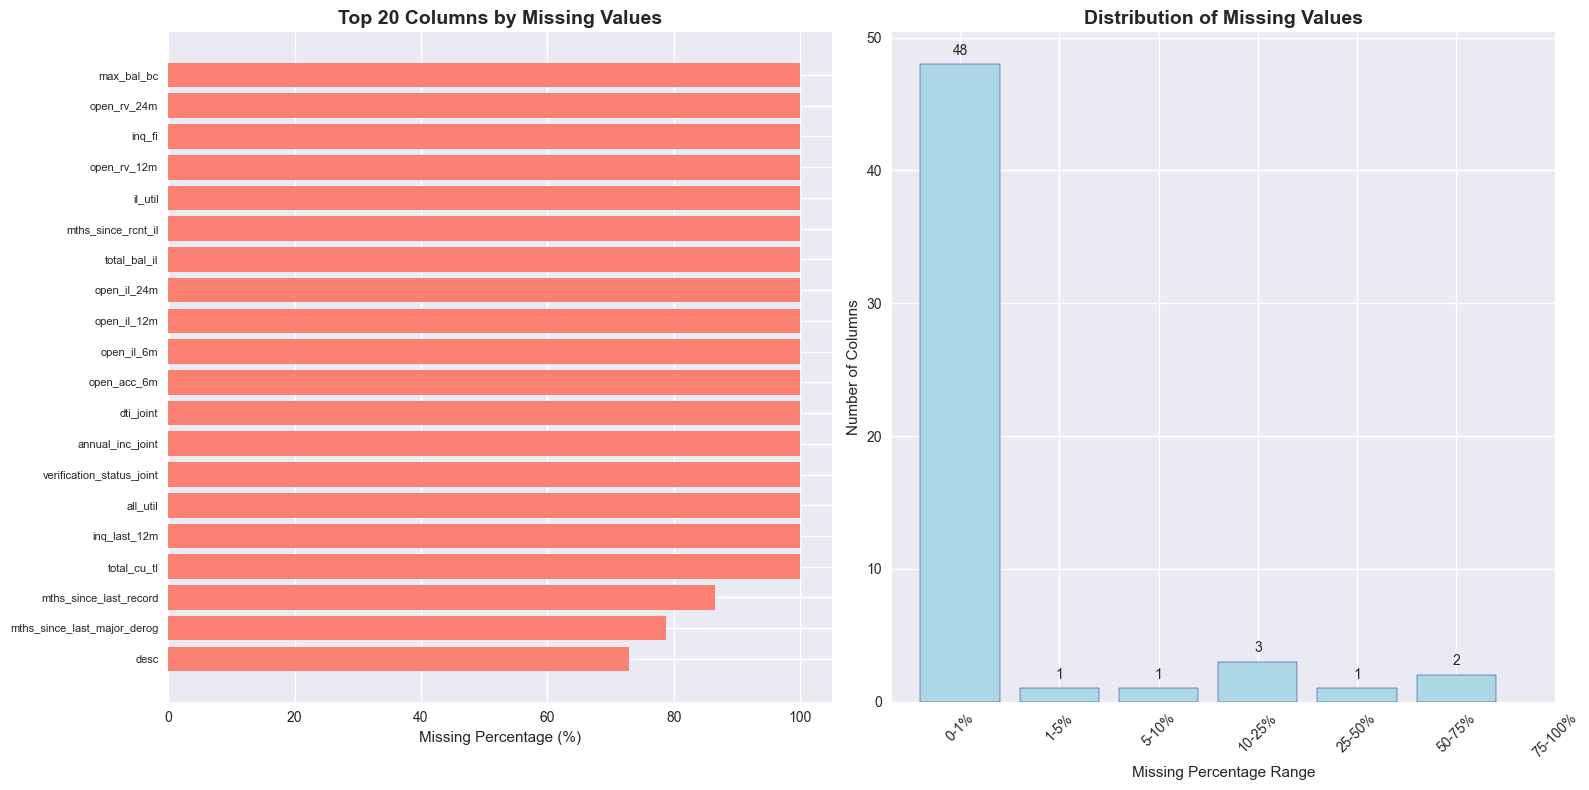


💡 Missing Values Handling Recommendations:

🔴 HIGH MISSING (>50%): Consider dropping these columns
   - max_bal_bc: 100.0%
   - open_rv_24m: 100.0%
   - inq_fi: 100.0%
   - open_rv_12m: 100.0%
   - il_util: 100.0%
   - mths_since_rcnt_il: 100.0%
   - total_bal_il: 100.0%
   - open_il_24m: 100.0%
   - open_il_12m: 100.0%
   - open_il_6m: 100.0%
   - open_acc_6m: 100.0%
   - dti_joint: 100.0%
   - annual_inc_joint: 100.0%
   - verification_status_joint: 100.0%
   - all_util: 100.0%
   - inq_last_12m: 100.0%
   - total_cu_tl: 100.0%
   - mths_since_last_record: 86.6%
   - mths_since_last_major_derog: 78.8%
   - desc: 73.0%
   - mths_since_last_delinq: 53.7%

🟡 MEDIUM MISSING (10-50%): Requires careful imputation strategy
   - next_pymnt_d: 48.7% (object)
   - tot_coll_amt: 15.1% (float64)
   - total_rev_hi_lim: 15.1% (float64)
   - tot_cur_bal: 15.1% (float64)

🟢 LOW MISSING (0-10%): Simple imputation should work
   - emp_title: 5.9% (object)
   - emp_length: 4.5% (object)
   - last_pymn

In [13]:
if df is not None:
    print("="*80)
    print("MISSING VALUES ANALYSIS")
    print("="*80)
    
    # Calculate missing values
    missing_counts = df.isnull().sum()
    missing_percentages = (missing_counts / len(df) * 100).round(2)
    
    # Create missing values DataFrame
    missing_df = pd.DataFrame({
        'Column': df.columns,
        'Missing Count': missing_counts.values,
        'Missing %': missing_percentages.values,
        'Data Type': df.dtypes.values
    })
    
    # Sort by missing percentage
    missing_df = missing_df.sort_values('Missing %', ascending=False)
    
    # Summary statistics
    total_columns = len(df.columns)
    columns_with_missing = (missing_counts > 0).sum()
    columns_with_high_missing = (missing_percentages > 50).sum()
    
    print(f"\n📊 Missing Values Summary:")
    print(f"   Total columns: {total_columns}")
    print(f"   Columns with missing values: {columns_with_missing} ({columns_with_missing/total_columns*100:.1f}%)")
    print(f"   Columns with >50% missing: {columns_with_high_missing}")
    print(f"   Total missing values: {missing_counts.sum():,}")
    
    # Display columns with missing values
    missing_cols = missing_df[missing_df['Missing Count'] > 0]
    
    if len(missing_cols) > 0:
        print(f"\n📋 Columns with Missing Values ({len(missing_cols)} columns):")
        print("="*80)
        
        # Format display
        for _, row in missing_cols.iterrows():
            missing_bar = '█' * int(row['Missing %'] / 2)  # Visual bar
            print(f"{row['Column']:<30} | {row['Missing Count']:>8,} | {row['Missing %']:>6.2f}% | {missing_bar}")
        
        # Visualize missing values pattern
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
        
        # Missing values by column (top 20)
        top_missing = missing_cols.head(20)
        ax1.barh(range(len(top_missing)), top_missing['Missing %'], color='salmon')
        ax1.set_yticks(range(len(top_missing)))
        ax1.set_yticklabels(top_missing['Column'], fontsize=8)
        ax1.invert_yaxis()
        ax1.set_xlabel('Missing Percentage (%)')
        ax1.set_title('Top 20 Columns by Missing Values', fontsize=14, fontweight='bold')
        
        # Missing percentage distribution
        missing_bins = [0, 1, 5, 10, 25, 50, 75, 100]
        missing_hist, _ = np.histogram(missing_percentages, bins=missing_bins)
        
        ax2.bar(range(len(missing_hist)-1), missing_hist[:-1], color='lightblue', edgecolor='navy')
        ax2.set_xlabel('Missing Percentage Range')
        ax2.set_ylabel('Number of Columns')
        ax2.set_title('Distribution of Missing Values', fontsize=14, fontweight='bold')
        ax2.set_xticks(range(len(missing_bins)-1))
        ax2.set_xticklabels([f'{missing_bins[i]}-{missing_bins[i+1]}%' for i in range(len(missing_bins)-1)], 
                          rotation=45)
        
        # Add value labels on bars
        for i, v in enumerate(missing_hist[:-1]):
            if v > 0:
                ax2.text(i, v + 0.5, str(int(v)), ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
        
        # Recommendations for handling missing values
        print(f"\n💡 Missing Values Handling Recommendations:")
        print("="*60)
        
        high_missing = missing_df[missing_df['Missing %'] > 50]
        if len(high_missing) > 0:
            print(f"\n🔴 HIGH MISSING (>50%): Consider dropping these columns")
            for _, row in high_missing.iterrows():
                print(f"   - {row['Column']}: {row['Missing %']:.1f}%")
        
        medium_missing = missing_df[(missing_df['Missing %'] > 10) & (missing_df['Missing %'] <= 50)]
        if len(medium_missing) > 0:
            print(f"\n🟡 MEDIUM MISSING (10-50%): Requires careful imputation strategy")
            for _, row in medium_missing.head(5).iterrows():
                print(f"   - {row['Column']}: {row['Missing %']:.1f}% ({row['Data Type']})")
            if len(medium_missing) > 5:
                print(f"   ... and {len(medium_missing)-5} more columns")
        
        low_missing = missing_df[(missing_df['Missing %'] > 0) & (missing_df['Missing %'] <= 10)]
        if len(low_missing) > 0:
            print(f"\n🟢 LOW MISSING (0-10%): Simple imputation should work")
            for _, row in low_missing.head(5).iterrows():
                print(f"   - {row['Column']}: {row['Missing %']:.1f}% ({row['Data Type']})")
            if len(low_missing) > 5:
                print(f"   ... and {len(low_missing)-5} more columns")
    
    else:
        print("\n✅ No missing values found in the dataset!")
    
else:
    print("❌ No dataset available for missing values analysis")

## 5. Data Types Analysis

In [14]:
if df is not None:
    print("="*80)
    print("DATA TYPES ANALYSIS")
    print("="*80)
    
    # Analyze data types
    dtype_analysis = pd.DataFrame({
        'Data Type': df.dtypes.value_counts().index,
        'Count': df.dtypes.value_counts().values
    })
    
    print(f"\n📊 Data Types Distribution:")
    print("="*40)
    for _, row in dtype_analysis.iterrows():
        percentage = row['Count'] / len(df.columns) * 100
        print(f"   {row['Data Type']:<20} : {row['Count']:>3} columns ({percentage:>5.1f}%)")
    
    # Detailed analysis by data type
    print(f"\n🔍 Detailed Data Type Analysis:")
    print("="*40)
    
    # Numerical columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    print(f"\n📊 Numerical Columns ({len(numeric_cols)}):")
    
    # Basic statistics for numerical columns
    if len(numeric_cols) > 0:
        numeric_stats = df[numeric_cols].describe().T
        print(f"   Range of values:")
        for col in numeric_cols[:10]:  # Show first 10
            min_val = numeric_stats.loc[col, 'min']
            max_val = numeric_stats.loc[col, 'max']
            mean_val = numeric_stats.loc[col, 'mean']
            print(f"     {col:<25}: {min_val:>12,.2f} to {max_val:>12,.2f} (avg: {mean_val:>8,.2f})")
        if len(numeric_cols) > 10:
            print(f"     ... and {len(numeric_cols)-10} more numerical columns")
    
    # Categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    print(f"\n📝 Categorical Columns ({len(categorical_cols)}):")
    
    if len(categorical_cols) > 0:
        print(f"   Cardinality analysis:")
        for col in categorical_cols[:15]:  # Show first 15
            unique_count = df[col].nunique()
            sample_values = df[col].dropna().unique()[:3]  # Show sample values
            sample_str = ', '.join([str(v) for v in sample_values])
            if len(sample_values) < df[col].nunique():
                sample_str += ', ...'
            print(f"     {col:<25}: {unique_count:>3} unique values")
            print(f"     {'':25}   Sample: {sample_str[:50]}")
        if len(categorical_cols) > 15:
            print(f"     ... and {len(categorical_cols)-15} more categorical columns")
    
    # DateTime columns (if any)
    datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()
    print(f"\n📅 DateTime Columns ({len(datetime_cols)}):")
    for col in datetime_cols:
        min_date = df[col].min()
        max_date = df[col].max()
        print(f"     {col:<25}: {min_date} to {max_date}")
    
    # Potential type conversion candidates
    print(f"\n🔧 Potential Type Conversions:")
    print("="*40)
    
    # Look for columns that might need conversion
    conversion_candidates = []
    
    # Check for percentage columns
    for col in df.columns:
        if df[col].dtype == 'object':
            sample_vals = df[col].dropna().head(5).astype(str)
            # Check for percentage
            if sample_vals.str.contains('%').any():
                conversion_candidates.append((col, 'percentage', sample_vals.tolist()))
            # Check for dates
            elif sample_vals.str.match(r'\w{3}-\d{2}').all():
                conversion_candidates.append((col, 'date', sample_vals.tolist()))
            # Check for numeric with special characters
            elif sample_vals.str.contains(r'\$|,').any():
                conversion_candidates.append((col, 'currency', sample_vals.tolist()))
    
    if conversion_candidates:
        print(f"   Found {len(conversion_candidates)} columns that may need type conversion:")
        for col, conv_type, samples in conversion_candidates[:10]:
            print(f"     - {col} ({conv_type}): {samples[:2]}")
        if len(conversion_candidates) > 10:
            print(f"     ... and {len(conversion_candidates)-10} more columns")
    else:
        print("   No obvious type conversion candidates found.")
    
    # Visualize data type distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Data type pie chart
    dtype_counts = df.dtypes.value_counts()
    colors = plt.cm.Set3(np.linspace(0, 1, len(dtype_counts)))
    ax1.pie(dtype_counts.values, labels=dtype_counts.index, autopct='%1.1f%%', 
           colors=colors, startangle=90)
    ax1.set_title('Data Type Distribution', fontsize=14, fontweight='bold')
    
    # Column count by type
    ax2.bar(range(len(dtype_counts)), dtype_counts.values, color=colors)
    ax2.set_xlabel('Data Type')
    ax2.set_ylabel('Number of Columns')
    ax2.set_title('Column Count by Data Type', fontsize=14, fontweight='bold')
    ax2.set_xticks(range(len(dtype_counts)))
    ax2.set_xticklabels(dtype_counts.index, rotation=45)
    
    # Add value labels
    for i, v in enumerate(dtype_counts.values):
        ax2.text(i, v + 0.5, str(int(v)), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("❌ No dataset available for data type analysis")

DATA TYPES ANALYSIS

📊 Data Types Distribution:


TypeError: unsupported format string passed to numpy.dtypes.Float64DType.__format__

## 6. Initial Statistical Summary

In [ ]:
if df is not None:
    print("="*80)
    print("INITIAL STATISTICAL SUMMARY")
    print("="*80)
    
    # Numerical columns statistics
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) > 0:
        print(f"\n📊 Numerical Columns Statistics (Top 15 by range):")
        print("="*60)
        
        # Calculate statistics
        stats_df = df[numeric_cols].describe().T
        
        # Add additional statistics
        stats_df['range'] = stats_df['max'] - stats_df['min']
        stats_df['missing_pct'] = (df[numeric_cols].isnull().sum() / len(df) * 100)
        stats_df['zeros_pct'] = ((df[numeric_cols] == 0).sum() / len(df) * 100)
        
        # Sort by range (descending)
        stats_df = stats_df.sort_values('range', ascending=False)
        
        # Display top 15
        display_cols = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'range', 'missing_pct', 'zeros_pct']
        
        # Format for display
        for col in stats_df.head(15).index:
            row = stats_df.loc[col]
            print(f"\n🔢 {col}:")
            print(f"   Count: {int(row['count']):,} | Missing: {row['missing_pct']:.1f}% | Zeros: {row['zeros_pct']:.1f}%")
            print(f"   Range: {row['min']:,.2f} to {row['max']:,.2f} (spread: {row['range']:,.2f})")
            print(f"   Central tendency: Mean={row['mean']:,.2f}, Median={row['50%']:,.2f}")
            print(f"   Dispersion: Std={row['std']:,.2f}, IQR={row['75%']-row['25%']:,.2f}")
    
    # Categorical columns statistics
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    if len(categorical_cols) > 0:
        print(f"\n\n📝 Categorical Columns Statistics:")
        print("="*50)
        
        for col in categorical_cols[:10]:  # Analyze first 10 categorical columns
            unique_count = df[col].nunique()
            missing_count = df[col].isnull().sum()
            most_common = df[col].mode().iloc[0] if not df[col].mode().empty else 'N/A'
            most_common_pct = (df[col] == most_common).mean() * 100
            
            print(f"\n📋 {col}:")
            print(f"   Unique values: {unique_count:,}")
            print(f"   Missing: {missing_count:,} ({missing_count/len(df)*100:.1f}%)")
            print(f"   Most common: '{most_common}' ({most_common_pct:.1f}%)")
            
            # Show top categories
            value_counts = df[col].value_counts().head(3)
            print(f"   Top 3 values:")
            for val, count in value_counts.items():
                pct = count / len(df) * 100
                print(f"     '{val}': {count:,} ({pct:.1f}%)")
        
        if len(categorical_cols) > 10:
            print(f"\n   ... and {len(categorical_cols)-10} more categorical columns")
    
    # Quick outlier detection
    print(f"\n\n⚠️  Potential Outliers (based on IQR method):")
    print("="*50)
    
    outliers_detected = 0
    for col in numeric_cols[:20]:  # Check first 20 numeric columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_pct = outliers / len(df) * 100
        
        if outlier_pct > 1:  # More than 1% outliers
            print(f"   {col}: {outliers:,} outliers ({outlier_pct:.1f}%)")
            outliers_detected += 1
    
    if outliers_detected == 0:
        print("   No significant outliers detected in the sample columns.")
    
else:
    print("❌ No dataset available for statistical analysis")

## 7. Summary and Next Steps

In [ ]:
if df is not None:
    print("="*80)
    print("DATA EXPLORATION SUMMARY")
    print("="*80)
    
    # Key findings
    print(f"\n📊 DATASET SUMMARY:")
    print(f"   • Total Records: {df.shape[0]:,}")
    print(f"   • Total Features: {df.shape[1]}")
    print(f"   • Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
    
    if 'loan_status' in df.columns:
        completed_loans = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]
        default_rate = (completed_loans['loan_status'] == 'Charged Off').mean() * 100 if len(completed_loans) > 0 else 0
        print(f"   • Completed Loans: {len(completed_loans):,} ({len(completed_loans)/len(df)*100:.1f}%)")
        print(f"   • Default Rate: {default_rate:.2f}%")
    
    # Data quality issues
    missing_cols = (df.isnull().sum() > 0).sum()
    high_missing_cols = ((df.isnull().sum() / len(df) * 100) > 50).sum()
    
    print(f"\n🔍 DATA QUALITY ISSUES:")
    print(f"   • Columns with missing values: {missing_cols} ({missing_cols/len(df.columns)*100:.1f}%)")
    print(f"   • Columns with >50% missing: {high_missing_cols}")
    print(f"   • Total missing values: {df.isnull().sum().sum():,}")
    
    # Feature categories
    numeric_count = len(df.select_dtypes(include=[np.number]).columns)
    categorical_count = len(df.select_dtypes(include=['object', 'category']).columns)
    
    print(f"\n📋 FEATURE DISTRIBUTION:")
    print(f"   • Numerical features: {numeric_count}")
    print(f"   • Categorical features: {categorical_count}")
    print(f"   • DateTime features: {len(df.select_dtypes(include=['datetime64']).columns)}")
    
    print(f"\n🎯 NEXT STEPS FOR DATA CLEANING:")
    print("="*50)
    print("   1. Filter dataset to completed loans only (Fully Paid + Charged Off)")
    print("   2. Handle missing values based on importance and percentage")
    print("   3. Convert data types (percentages, dates, currencies)")
    print("   4. Create derived features (FICO average, financial ratios)")
    print("   5. Handle outliers in key numerical variables")
    print("   6. Encode categorical variables for modeling")
    
    # Save basic exploration results
    exploration_summary = {
        'dataset_shape': df.shape,
        'total_records': len(df),
        'total_features': len(df.columns),
        'missing_columns': missing_cols,
        'high_missing_columns': high_missing_cols,
        'numeric_features': numeric_count,
        'categorical_features': categorical_count,
        'completed_loans': len(completed_loans) if 'loan_status' in df.columns else 0,
        'default_rate': default_rate if 'loan_status' in df.columns else 0,
        'exploration_date': datetime.now().isoformat()
    }
    
    # Save summary to file
    import json
    try:
        with open('../data/exploration_summary.json', 'w') as f:
            json.dump(exploration_summary, f, indent=2, default=str)
        print(f"\n💾 Exploration summary saved to '../data/exploration_summary.json'")
    except:
        print(f"\n⚠️  Could not save exploration summary file")
    
    print(f"\n✅ Data exploration completed successfully!")
    print(f"📝 Ready to proceed to '02_data_cleaning.ipynb'")
    
else:
    print("❌ No dataset available for summary")
    print("\n💡 Please ensure the dataset is available and try again")
    print("   Expected location: data/raw/loan_data_2007_2014.csv")